# Loading Datasets

In [243]:
import pandas as pd

In [244]:
df = pd.read_csv('churn.csv')

In [245]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


In [246]:
from sklearn.model_selection import train_test_split as split

In [247]:
train_x, test_x, train_y, test_y = split(df.drop(columns=['class']), df['class'], test_size=0.2)

In [248]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

In [249]:
# model = Sequential()

# model.add(Dense(2,activation='relu',input_dim=2))
# model.add(Dense(2,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))

model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [250]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=5,
)

In [251]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [252]:
history = model.fit(train_x, train_y, epochs=200, validation_split=0.1)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.7815 - val_loss: 0.7049
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8015 - val_loss: 0.7089
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7727 - val_loss: 0.7111
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8074 - val_loss: 0.7116
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8132 - val_loss: 0.7123
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7399 - val_loss: 0.7134
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8561 - val_loss: 0.7141
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8145 - val_loss: 0.7141
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7330 - val_loss: 0.7134
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7465 - val_loss: 0.7127
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7234 - val_loss: 0.7116
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [253]:
prob = model.predict(test_x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [254]:
import numpy as np

In [255]:
predict = np.where(prob>=0.5, 1, 0)

In [256]:
predict

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [257]:
from sklearn.metrics import accuracy_score as score

In [258]:
score(test_y, predict)

0.68

In [259]:
import matplotlib.pyplot as plt

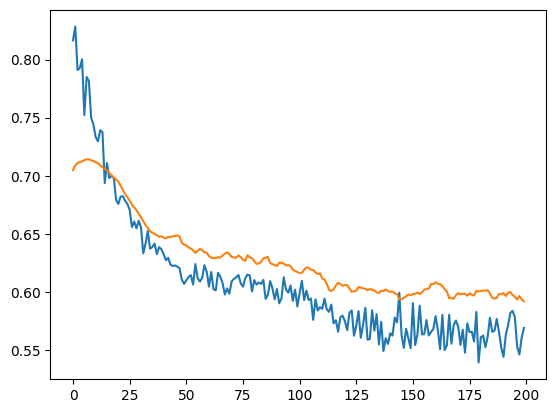

In [260]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])